In [91]:
import pandas as pd
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, precision_recall_curve
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [92]:
data = pd.read_csv('../data/data_nc.nctools-predictions.txt', sep='\t')

['ReMM_score',
 'NCBoost_Score',
 'NCBoost_Score-merged-chrom-pos',
 'NCBoost_precomputed_score',
 'NCBoost_precomputed_score-merged-chrom-pos',
 'DeepSEA_Functional_significance_score',
 'Eigen-raw',
 'Eigen-phred',
 'Eigen-PC-raw',
 'Eigen-PC-phred',
 'Eigen-raw_merged-chr-pos',
 'Eigen-PC-raw_merged-chr-pos',
 'LINSIGHT_score']

In [96]:
data[cols].head()

,ReMM_score,NCBoost_Score,NCBoost_Score-merged-chrom-pos,NCBoost_precomputed_score,NCBoost_precomputed_score-merged-chrom-pos,DeepSEA_Functional_significance_score,Eigen-raw,Eigen-phred,Eigen-PC-raw,Eigen-PC-phred,Eigen-raw_merged-chr-pos,Eigen-PC-raw_merged-chr-pos,LINSIGHT_score
0,0.925,0.043725,0.043725,NaN,NaN,0.052103,1.238354,16.9482,4.016659,22.9740,1.238354,4.016659,0.113951
1,0.611,0.271459,0.271459,NaN,NaN,0.066242,0.659571,12.9560,4.729346,25.1265,0.659571,4.729346,0.214607
2,0.987,0.286262,0.286262,NaN,NaN,0.002187,2.062309,29.9619,6.894449,34.0382,2.062309,6.894449,0.055969
3,0.931,0.233192,0.233192,NaN,NaN,0.019955,1.407326,18.6791,1.703142,16.7387,1.407326,1.703142,0.160774
4,0.692,0.081881,0.081881,NaN,NaN,0.033797,0.769803,13.7296,1.578439,16.3985,0.769803,1.578439,0.081169


In [25]:
data['sample_weight'].value_counts()

0.8    74902
1.0     6668
Name: sample_weight, dtype: int64

In [26]:
data.label.value_counts()

Benign        79577
Pathogenic     2611
Name: label, dtype: int64

<h3>Scaling predictions between 0 - 1</h3>

To easily compare predictions with each other, scale all of them between 0 and 1. 

In [97]:
#Max values
data[cols].max()

ReMM_score                                     1.000000
NCBoost_Score                                  0.918831
NCBoost_Score-merged-chrom-pos                 0.918831
NCBoost_precomputed_score                      0.953254
NCBoost_precomputed_score-merged-chrom-pos     0.953254
DeepSEA_Functional_significance_score          0.804400
Eigen-raw                                      3.834147
Eigen-phred                                   53.846400
Eigen-PC-raw                                  10.676047
Eigen-PC-phred                                50.580700
Eigen-raw_merged-chr-pos                       3.834147
Eigen-PC-raw_merged-chr-pos                   10.676047
LINSIGHT_score                                 0.993462
dtype: float64

In [98]:
#Min values
data[cols].min()

ReMM_score                                    0.000000
NCBoost_Score                                 0.008056
NCBoost_Score-merged-chrom-pos                0.008056
NCBoost_precomputed_score                     0.009636
NCBoost_precomputed_score-merged-chrom-pos    0.009636
DeepSEA_Functional_significance_score         0.000010
Eigen-raw                                    -1.507438
Eigen-phred                                   0.000049
Eigen-PC-raw                                 -0.365435
Eigen-PC-phred                                0.000089
Eigen-raw_merged-chr-pos                     -1.507438
Eigen-PC-raw_merged-chr-pos                  -0.365435
LINSIGHT_score                                0.034344
dtype: float64

Most scores already seem to range from 0 - 1. Only scale the Eigen and LINSIGHT scores.

In [110]:
scale_min_max = lambda x: (data[x] - data[x].min()) / (data[x].max() - data[x].min())
data['Eigen-raw-scaled'] = scale_min_max('Eigen-raw')
data['Eigen PC-raw-scaled'] = scale_min_max('Eigen-PC-raw')
data['Eigen-PC-raw_merged-chr-pos-scaled'] = scale_min_max('Eigen-PC-raw_merged-chr-pos')
data['Eigen-raw_merged-chr-pos-scaled'] = scale_min_max('Eigen-raw_merged-chr-pos')
data['LINSIGHT_score-scaled'] = scale_min_max('LINSIGHT_score')

#train['Eigen-raw-scaled'] = (train['Eigen-raw'] - train['Eigen-raw'].min()) / (train['Eigen-raw'].max() - train['Eigen-raw'].min())

<h3>Plotting</h3>

In [118]:
# cols = [x for x in data.columns if re.search(r'NCBoost_Score|NCBoost_precomputed_score|NCBoost_chr|DeepSEA|ReMM|Eigen|LINSIGHT', x)]
cols = ['ReMM_score',
 'NCBoost_Score',
 'NCBoost_Score-merged-chrom-pos',
 'NCBoost_precomputed_score',
 'NCBoost_precomputed_score-merged-chrom-pos',
 'DeepSEA_Functional_significance_score',
#  'Eigen-raw',
#  'Eigen-phred',
#  'Eigen-PC-raw',
#  'Eigen-PC-phred',
#  'Eigen-raw_merged-chr-pos',
#  'Eigen-PC-raw_merged-chr-pos',
#  'LINSIGHT_score',
 'Eigen-raw-scaled',
 'Eigen PC-raw-scaled',
 'LINSIGHT_score-scaled',
 'Eigen-PC-raw_merged-chr-pos-scaled',
 'Eigen-raw_merged-chr-pos-scaled'
]

In [ ]:
df = pd.melt(data[cols + ['label']], id_vars='label', value_vars=cols)

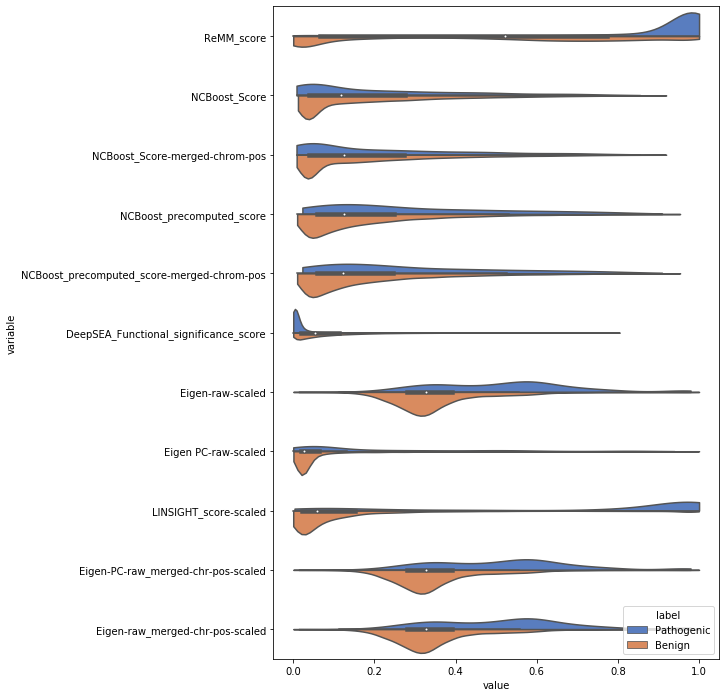

In [144]:
plt.figure(figsize=(8,12))
sns.violinplot(x='value', y="variable", hue='label', data=df, palette="muted", split=True, cut=0)

In [123]:
data.Type.value_counts()

SNV    71512
DEL     6380
INS     4296
Name: Type, dtype: int64

<h3>Precision recall curves</h3>

In [145]:
#Drop NA rows for predictions
print(data.label.value_counts())
data_snvs = data[data.Ref.apply(lambda x: len(x) == 1) & data.Alt.apply(lambda x: len(x) == 1)]
print(data_snvs.label.value_counts())
data_filtered = data_snvs.dropna(subset=['ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen-raw-scaled', 'LINSIGHT_score-scaled'])
print(data_filtered.label.value_counts())

Benign        79577
Pathogenic     2611
Name: label, dtype: int64
Benign        69055
Pathogenic     2369
Name: label, dtype: int64
Benign        62655
Pathogenic      859
Name: label, dtype: int64


In [166]:
#data_filtered = data_snvs.dropna(subset=['NCBoost_Score', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen-raw-scaled', 'LINSIGHT_score-scaled'])
data_filtered = data_snvs.dropna(subset=['NCBoost_Score', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen-raw-scaled', 'LINSIGHT_score-scaled'])
print(data_filtered.label.value_counts())

Benign        25594
Pathogenic      484
Name: label, dtype: int64


In [167]:
def plot_precision_recall_curve(df, cols):
    pr = {}
    for tool in cols:
        p, r, t = precision_recall_curve(df['binarized_label'], df[tool])
        pr[tool] = {'p': p, 'r': r, 't':t}

    plt.figure(figsize=(9, 5))
    for t in pr:
        plt.plot(pr[t]['r'], pr[t]['p'], label='{} (AUC: {})'.format(t, round(auc(pr[t]['r'], pr[t]['p']), 2)))
    plt.legend()

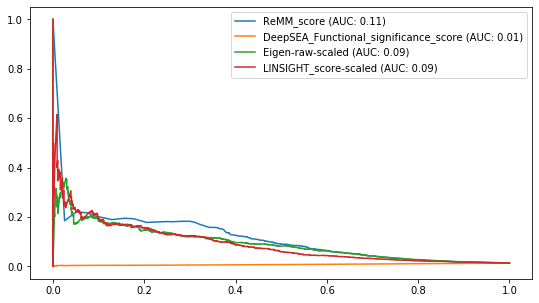

In [165]:
plot_precision_recall_curve(data_filtered, cols=['ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen-raw-scaled', 'LINSIGHT_score-scaled'])

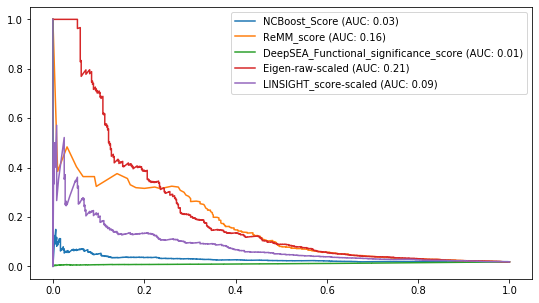

In [168]:
plot_precision_recall_curve(data_filtered, cols=['NCBoost_Score', 'ReMM_score', 'DeepSEA_Functional_significance_score', 'Eigen-raw-scaled', 'LINSIGHT_score-scaled'])

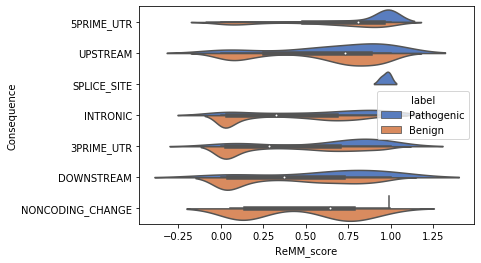

In [141]:
sns.violinplot(x='ReMM_score', y="Consequence", hue='label', data=data_filtered, palette="muted", split=True)

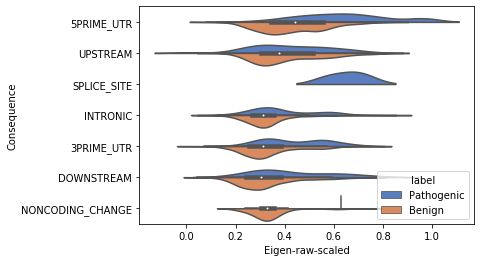

In [147]:
sns.violinplot(x='Eigen-raw-scaled', y="Consequence", hue='label', data=data_filtered, palette="muted", split=True)

In [236]:
#sns.boxplot(x='ReMM_score', y="Consequence", hue='label', data=train_filtered, palette="muted")

Text(0.5, 1.0, 'INTRONIC')

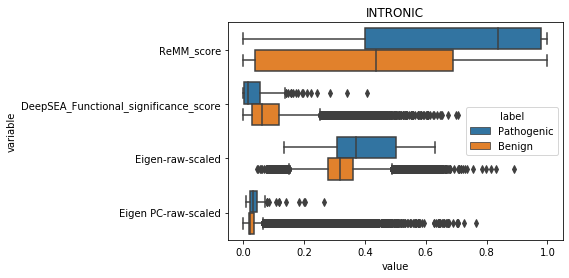

In [237]:
#df = pd.melt(train[tools + ['label']], id_vars='label', value_vars=tools)
sns.boxplot(x='value', y='variable', hue='label', data=pd.melt(train[train.Consequence=='INTRONIC'][tools + ['label']], value_vars=tools, id_vars='label')).set_title('INTRONIC')

Text(0.5, 1.0, 'DOWNSTREAM')

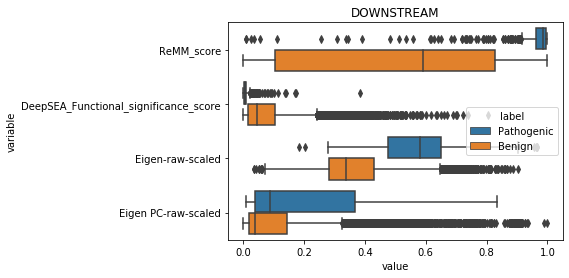

In [238]:
sns.boxplot(x='value', y='variable', hue='label', data=pd.melt(train[train.Consequence=='DOWNSTREAM'][tools + ['label']], value_vars=tools, id_vars='label')).set_title('DOWNSTREAM')

In [178]:
confusion_matrix(train_filtered['binarized_label'], train_filtered['ReMM_score'].apply(lambda x: 1 if x > 0.8 else 0), labels=[1,0])

array([[  203,   103],
       [10827, 49139]])

In [199]:
data_filtered[data_filtered.NCBoost_data][['#Chrom', 'Pos', 'label', 'NCBoost_Score']].head(20)

,#Chrom,Pos,label,NCBoost_Score
0,1,21835920,Pathogenic,0.043725
1,1,55505180,Pathogenic,0.271459
2,1,113498814,Pathogenic,0.286262
3,1,209975332,Pathogenic,0.233192
4,1,209975361,Pathogenic,0.081881
5,1,209979367,Pathogenic,0.161182
6,1,209979435,Pathogenic,0.189841
7,1,216596610,Pathogenic,0.257114
8,1,228337561,Pathogenic,0.467702
9,10,27389371,Pathogenic,0.162982


In [179]:
train.label.value_counts()

Benign        79367
Pathogenic     1773
Name: label, dtype: int64

In [193]:
train_filtered.label.value_counts()

Benign        59966
Pathogenic      306
Name: label, dtype: int64

In [195]:
train_high_confidence.label.value_counts()

Benign        1967
Pathogenic      98
Name: label, dtype: int64

In [200]:
print(train_filtered[train_filtered.label == 'Pathogenic']['Consequence'].value_counts())
print(train_filtered[train_filtered.label == 'Benign']['Consequence'].value_counts())

INTRONIC            115
DOWNSTREAM           91
UPSTREAM             81
NONCODING_CHANGE     17
3PRIME_UTR            2
Name: Consequence, dtype: int64
INTRONIC            32037
DOWNSTREAM          12088
3PRIME_UTR           7160
UPSTREAM             6748
NONCODING_CHANGE      968
5PRIME_UTR            959
INTERGENIC              6
Name: Consequence, dtype: int64


In [202]:
test = pd.read_csv('../data/test_nc.txt', sep='\t')

In [239]:
print(test[test.label == 'Pathogenic']['Consequence'].value_counts())
print(test[test.label == 'Benign']['Consequence'].value_counts())

DOWNSTREAM          109
UPSTREAM             65
INTRONIC             30
NONCODING_CHANGE      7
5PRIME_UTR            4
Name: Consequence, dtype: int64
DOWNSTREAM          109
UPSTREAM             65
INTRONIC             30
NONCODING_CHANGE      7
5PRIME_UTR            4
Name: Consequence, dtype: int64


In [ ]:
#allele frequency
#consequence
